In [1]:
import cv2 as cv

In [2]:
# openCV version
print(cv.__version__)

3.1.0


# 圖像入門
## 讀取圖檔
使用 cv.imread()讀取圖像。
第一個參數，圖檔名
第二個參數，是一個Flag，指定讀取圖像的方式
* cv.IMREAD_COLOR: 加載彩色圖像。任何圖像的透明度都將被忽略。
* cv.IMREAD_GRAYSCAL: 以灰度模式加載圖像。
* cv.IMREAD_UNCHANGED: 加載圖像，包括alpha通道。

In [3]:
import numpy as np
import cv2 as cv
# 以灰度加載彩色圖像
img = cv.imread('messi5.jpg',cv.IMREAD_GRAYSCALE)

*警告*  
即使圖像路徑錯誤，它也不會拋出任何錯誤，但<code>print(img)</code>會給出<code>None</code>

## 顯示圖像
使用 cv.imshow() 在窗口中顯示圖像。窗口自動調整圖像大小。
第一個參數是一個窗口名稱，它是一個字符串。
第二個參數是我們的形象。你可以根據需要創建任意數量的窗口，但具有不同的窗口名稱。

In [4]:
cv.imshow('image', img)
cv.waitKey(0)
cv.destroyAllWindows()

cv.waitKey() 是一個鍵盤綁定函數。它的參數是以ms為單位的時間。該函數等待任何鍵盤事件的指定ms。如果你在該時間內按任意建，程序將繼續。如果為0，則無限期等待鍵擊。它也可以設置為檢測特定的鍵擊，如果按下鍵a等。

cv.destroyAllWindows() 只是破壞了我們創建的所有窗口。如果要銷毀任何特定窗口，請使用cv.destroyWindow()，其中傳遞確切的窗口名稱作為參數。  
*注意*  
有一種特殊情況，您可以在以後創建窗口並將圖像加載到該窗口。在這種情況下，您可以指定窗口是否可調整大小。它使用函數cv.namedWindow（）完成。默認情況下，標誌為cv.WINDOW_AUTOSIZE。但是如果將flag指定為cv.WINDOW_NORMAL，則可以調整窗口大小。當圖像尺寸過大並向窗口添加軌跡欄時，它會很有用。

In [5]:
cv.namedWindow('image', cv.WINDOW_NORMAL)
cv.imshow('image', img)
cv.waitKey(0)
cv.destroyAllWindows()

## 寫一個圖像
使用 cv.imwrite() 保存圖像。
第一個參數是文件名
第二個參數是要保存的圖像

In [6]:
# 以工作目錄中的 PNG 格式保存圖像
cv.imwrite('messigray.png', img)

True

## 總結一下
下面的程序加載灰度圖像，顯示圖像，如果按's'並退出則保存圖像，或者按ESC鍵直接退出而不保存。

In [7]:
import numpy as np
import cv2 as cv

img = cv.imread('messi5.jpg',0)
cv.imshow('image', img)
k = cv.waitKey(0)
if k== 27:    # 等待 ESC 鍵退出
    cv.destroyAllWindows()
elif k == ord('s'):    # 等待 's' 鍵保存並退出
    cv.imwrite('messigray.png', img)
    cv.destroyAllWindows()

*警告*  
如果你使用的是64-bits計算機，則必須 <code>k = cv.waitKey(0)</code> 按如下方式修改行：  
<code>k=cv.waitKey(0) & 0xFF</code>

## 使用 Matplotlib
Matplotlib是Python的繪圖庫，為您提供各種繪圖方法。在這裡，您將學習如何使用Matplotlib顯示圖像。您可以使用Matplotlib縮放圖像，保存等。

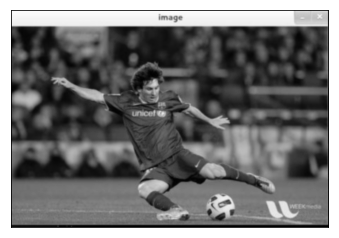

In [8]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('messi5.jpg',0)
plt.imshow(img, cmap='gray', interpolation='bicubic')
plt.xticks([]), plt.yticks([])    # 隱藏 X 和 Y 軸上的刻度值
plt.show()

# 視頻入門
## 從相機捕獲視頻
通常，我們必須用相機捕捉直播。OpenCV為此提供了一個非常簡單的接口。讓我們從相機中捕捉視頻（我正在使用筆記本電腦的內置網絡攝像頭），將其轉換為灰度視頻並顯示它。入門只是一項簡單的任務。  

要捕獲視頻，您需要創建一個VideoCapture對象。它的參數可以是設備索引或視頻文件的名稱。設備索引只是指定哪個攝像頭的數量。通常會連接一台攝像機（如我的情況）。所以我只傳遞0（或-1）。您可以通過傳遞1來選擇第二個攝像頭，依此類推。之後，您可以逐幀捕獲。但最後，不要忘記發布捕獲。

In [13]:
import numpy as np
import cv2 as cv

cap = cv.VideoCapture(0)
while(True):
    # 逐幀捕獲
    ret, frame = cap.read()
    
    # 對框架的操作
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    
    # 顯示結果幀
    cv.imshow('frame', gray)
    if cv.waitKey(1) & 0xFF == ord('q'):
        break
        
# 完成所有操作後，釋放捕獲
cap.release()
cv.destroyAllWindows()

cap.read()返回一個bool(True/False)。如果正確讀取幀，它將是True。因此，你可以通過檢查此返回值檢查視頻的結尾。  
你可以通過 cap.isOpened()方法檢查它是否己初始化。如果是的話True。否則使用cap.open()打開它。  
您還可以使用cap.get（propId）方法訪問此視頻的某些功能，其中propId是0到18之間的數字。每個數字表示視頻的屬性（如果它適用於該視頻），完整的詳細信息可以在這裡可以看到：cv :: VideoCapture :: get（）。其中一些值可以使用cap.set（propId，value）進行修改。價值是您想要的新價值。  
例如，我可以通過和檢查框架寬度和高度。它默認給我640x480。但我想將其修改為320x240。只需使用和。  
cap.get(cv.CAP_PROP_FRAME_WIDTH)  
cap.get(cv.CAP_PROP_FRAME_HEIGHT)  
ret = cap.set(cv.CAP_PROP_FRAME_WIDTH,320)  
ret = cap.set(cv.CAP_PROP_FRAME_HEIGHT,240)  

*注意*  
如果您收到錯誤，請確保使用任何其他相機應用程序（如Linux中的Cheese）正常工作。

## 從文件播放視頻
它與從相機拍攝相同，只需用視頻文件名更改相機索引即可。同時在顯示框架時，請使用適當的時間cv.waitKey()。如果它太小，視頻將非常快，如果它太高，視頻將會很慢（嗯，這就是你可以用慢動作顯示視頻）。在正常情況下，25毫秒就可以了。

In [14]:
import numpy as np
import cv2 as cv

cap = cv.VideoCapture('vtest.avi')
while(cap.isOpened()):
    ret, frame = cap.read()
    
    gray = cv.cvtColor(frame, cv.COLOR_RGB2GRAY)
    
    cv.imshow('frame', gray)
    if cv.waitKey(1) & 0xFF == ord('q'):
        break
        
cap.release()
cv.destroyAllWindows()

*注意*  
確保安裝了正確版本的ffmpeg或gstreamer。有時候，使用Video Capture是一個令人頭疼的問題，主要原因是錯誤安裝了ffmpeg / gstreamer。

## 保存視頻
創建一個VideoWriter對象。我們應該指定輸出文件名（例如：output.avi）。然後我們應該指定FourCC代碼（下一段中的詳細信息）。然後應該傳遞每秒幀數（fps）和幀大小。最後一個是isColor標誌。如果是True，編碼器需要彩色幀，否則它適用於灰度幀。  

FourCC是用於指定視頻編解碼器的4字節代碼。可以在fourcc.org中找到可用代碼列表。它取決於平台。以下編解碼器對我來說很好。  

* 在Fedora中：DIVX，XVID，MJPG，X264，WMV1，WMV2。（XVID更為可取.MJPG會產生高大小的視頻.X264提供非常小的視頻）
* 在Windows中：DIVX（更多要測試和添加）
* 在OSX中：MJPG（.mp4），DIVX（.avi），X264（.mkv）。

對於MJPG，FourCC代碼作為`cv.VideoWriter_fourcc（'M'，'J'，'P'，'G'）or cv.VideoWriter_fourcc（*'MJPG'）`傳遞。

在從相機捕獲的代碼下方，在垂直方向上翻轉每一幀並保存它。

In [18]:
import numpy as np
import cv2 as cv

cap = cv.VideoCapture(0)

# 定義編解碼器並創建 VideoWriter 對象
fourcc = cv.VideoWriter_fourcc(* 'XVID')
out = cv.VideoWriter('output.avi', fourcc, 20.0, (640,480))

while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == True:
        frame = cv.flip(frame, 0)
        
        # 寫下翻轉的幀
        out.write(frame)
        
        cv.imshow('frame', frame)
        if cv.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break
        
# 如果工作完成，釋放所有內容
cap.release()
out.release()
cv.destroyAllWindows()

# 在 OpenCV 中繪製函數
## 常見參數
* img: 要繪製形狀的圖像
* color：形狀的顏色。對於BGR，將其作為元組傳遞，例如：（255,0,0）為藍色。對於灰度，只需傳遞標量值。
* thickness：線條或圓形等的厚度。如果** - 1 **通過圓形等閉合數字，它將填充形狀。默認厚度= 1
* lineType：行的類型，是否為8連接，消除鋸齒線等。默認情況下，它是8連接的。 cv.LINE_AA給出抗鋸齒線，看起來很適合曲線。  

## 畫線
要繪製線條，您需要傳遞線條的起點和終點坐標。我們將創建一個黑色圖像，並在其上從左上角到右下角繪製一條藍線。

In [1]:
import numpy as np
import cv2 as cv
# 創建一個黑色圖像
img = np.zeros((512, 512, 3), np.uint8)

# 畫一條厚度為 5 像素的藍色斜線
cv.line(img, (0,0), (511,511), (255,0,0), 5)
cv.imshow('image',img)
cv.waitKey(0)
cv.destroyAllWindows()

## 繪製矩形
要繪製矩形，您需要矩形的左上角和右下角。這次我們將在圖像的右上角繪製一個綠色矩形。

In [2]:
cv.rectangle(img, (384,0), (510,128), (0,255,0), 3)
cv.imshow('image',img)
cv.waitKey(0)
cv.destroyAllWindows()

## 繪圓圈
要繪製圓，您需要其中心坐標和半徑。我們將在上面繪製的矩形內繪製一個圓。

In [3]:
cv.circle(img, (447, 63), 63, (0,0,255), -1)
cv.imshow('image', img)
cv.waitKey(0)
cv.destroyAllWindows()

## 繪製橢圓
要繪製橢圓，我們需要傳遞幾個參數。一個參數是中心位置（x，y）。下一個參數是軸長度（長軸長度，短軸長度）。角度是橢圓在逆時針方向上的旋轉角度。startAngle和endAngle表示從主軸順時針方向測量的橢圓弧的起點和終點。即給出值0和360給出完整的橢圓。有關更多詳細信息，請查看cv.ellipse（）的文檔。下面的示例在圖像的中心繪製一個半橢圓。

In [4]:
cv.ellipse(img, (256,256), (100, 50), 0, 0, 180, 255, -1)
cv.imshow('image', img)
cv.waitKey(0)
cv.destroyAllWindows()

## 繪製多邊形
要繪製多邊形，首先需要頂點坐標。將這些點轉換為ROWSx1x2形狀的數組，其中ROWS是頂點數，它應該是int32類型。在這裡，我們繪製一個帶有四個黃色頂點的小多邊形。

In [6]:
pts = np.array([[10,5], [20,30], [70,20], [50, 10]], np.int32)
pts = pts.reshape((-1, 1, 2))
cv.polylines(img, [pts], True, (0,255,255))
cv.imshow('image', img)
cv.waitKey(0)
cv.destroyAllWindows()

*注意*  
如果第三個參數為False，您將獲得連接所有點的折線，而不是閉合形狀。
cv.polylines（）可用於繪製多條線。只需創建要繪製的所有行的列表並將其傳遞給函數。所有線條都將單獨繪製。繪製一組行比為每行調用cv.line（）要好得多，速度更快。

## 向圖像添加文字
要將文本放入圖像中，您需要指定以下內容。

* 要寫入的文本數據
* 您想要放置它的位置坐標（即數據開始的左下角）。
* 字體類型（檢查cv.putText（）文檔以獲取支持的字體）
* 字體縮放（指定字體大小）
* 常規的東西，如顏色，粗細，線型等。為了更好看，建議使用lineType = cv.LINE_AA。

我們將以白色在我們的圖像上編寫OpenCV。

In [7]:
font = cv.FONT_HERSHEY_SIMPLEX
cv.putText(img, 'OpenCV', (10, 500), font, 4, (255, 255, 255), 2, cv.LINE_AA)
cv.imshow('image', img)
cv.waitKey(0)
cv.destroyAllWindows()

# 滑鼠作為畫筆
## 簡單的演示
在這裡，我們創建了一個簡單的應用程序，只要我們雙擊它就可以在圖像上繪製一個圓圈。

首先，我們創建一個鼠標回調函數，該函數在鼠標事件發生時執行。鼠標事件可以是與鼠標相關的任何內容，如左鍵向下，左鍵向上，左鍵雙擊等。它為我們提供了每個鼠標事件的坐標（x，y）。通過這個活動和地點，我們可以做任何我們喜歡的事情。要列出所有可用的可用事件，請在Python終端中運行以下代碼：

In [8]:
import cv2 as cv
# 列出 openCV 的所有 EVENT
events = [i for i in dir(cv) if 'EVENT' in i]
print(events)

['EVENT_FLAG_ALTKEY', 'EVENT_FLAG_CTRLKEY', 'EVENT_FLAG_LBUTTON', 'EVENT_FLAG_MBUTTON', 'EVENT_FLAG_RBUTTON', 'EVENT_FLAG_SHIFTKEY', 'EVENT_LBUTTONDBLCLK', 'EVENT_LBUTTONDOWN', 'EVENT_LBUTTONUP', 'EVENT_MBUTTONDBLCLK', 'EVENT_MBUTTONDOWN', 'EVENT_MBUTTONUP', 'EVENT_MOUSEHWHEEL', 'EVENT_MOUSEMOVE', 'EVENT_MOUSEWHEEL', 'EVENT_RBUTTONDBLCLK', 'EVENT_RBUTTONDOWN', 'EVENT_RBUTTONUP']


創建鼠標回調函數具有特定的格式，在任何地方都是相同的。它僅在功能方面有所不同。所以我們的鼠標回調函數做了一件事，它繪製了一個圓圈，我們雙擊。所以請看下面的代碼。代碼在評論中不言自明：

In [9]:
import numpy as np
import cv2 as cv

# mouse callback function
def draw_circle(event, x, y, flags, param):
    if event == cv.EVENT_LBUTTONDBLCLK:
        cv.circle(img, (x, y), 100, (255, 0, 0), -1)
        
# Create a black image, a window and bind the function to window
img = np.zeros((512, 512, 3), np.uint8)
cv.namedWindow('image')
cv.setMouseCallback('image', draw_circle)

while(1):
    cv.imshow('image', img)
    if cv.waitKey(20) & 0xFF == 27:   # 'ESC'
        break

cv.destroyAllWindows()

## 更高級的演示
我們通過拖動鼠標繪製矩形或圓形（取決於我們選擇的模式），就像在Paint應用程序中一樣。所以我們的鼠標回調函數有兩個部分，一個用於繪製矩形，另一個用於繪製圓形。這個具體的例子將非常有助於創建和理解一些交互式應用程序，如對象跟踪，圖像分割等。

In [12]:
import numpy as np
import cv2 as cv

drawing = False # 如果按下滑鼠，則為 True
mode = True # 如果為 True，則繪制矩形。按 'm' 切換到曲線
ix, iy = -1, -1

# mouse callback function
def draw_circle(event, x, y, flags, param):
    global ix, iy, drawing, mode
    
    if event == cv.EVENT_LBUTTONDOWN:
        drawing = True
        ix, iy = x,y
    elif event == cv.EVENT_MOUSEMOVE:
        if drawing == True:
            if mode == True:
                cv.rectangle(img, (ix, iy), (x, y), (0, 255, 0), -1)
            else:
                cv.circle(img, (x, y), 5, (0, 0, 255), -1)
    elif event == cv.EVENT_LBUTTONUP:
        drawing = False
        if mode == True:
            cv.rectangle(img, (ix, iy), (x, y), (0, 255, 0), -1)
        else:
            cv.circle(img, (x, y), 5, (0, 0, 255), -1)

接下來，我們必須將此鼠標回調函數綁定到OpenCV窗口。在主循環中，我們應該為鍵'm'設置鍵盤綁定以在矩形和圓之間切換。

In [14]:
img = np.zeros((512, 512, 3), np.uint8)
cv.namedWindow('image')
cv.setMouseCallback('image', draw_circle)

while(1):
    cv.imshow('image', img)
    k = cv.waitKey(1) & 0xFF
    if k == ord('m'):
        mode = not mode
    elif k == 27:  # 'ESC'
        break
        
cv.destroyAllWindows()

# Trackbar作為調色板
創建一個簡單的應用程序，顯示您指定的顏色。您有一個顯示顏色的窗口和三個軌道欄，用於指定B，G，R各顏色。您可以滑動軌跡欄並相應地窗口顏色更改。默認情況下，初始顏色將設置為黑色。

對於cv.getTrackbarPos（）函數，第一個參數是軌道欄名稱，第二個參數是它所附加的窗口名稱，第三個參數是默認值，第四個參數是最大值，第五個參數是執行的回調函數每次軌跡欄值都會發生變化。回調函數始終具有默認參數，即軌跡欄位置。在我們的例子中，函數什麼都不做，所以我們簡單地通過。

軌跡欄的另一個重要應用是將其用作按鈕或開關。默認情況下，OpenCV沒有按鈕功能。因此，您可以使用跟踪欄來獲得此類功能。在我們的應用程序中，我們創建了一個開關，其中應用程序僅在開關打開時有效，否則屏幕始終為黑色。

In [15]:
import numpy as np
import cv2 as cv

def nothing(x):
    pass

# Create a black image a window
img = np.zeros((300, 512, 3), np.uint8)
cv.namedWindow('image')

# create trackbar for color change
cv.createTrackbar('R', 'image', 0, 255, nothing)
cv.createTrackbar('G', 'image', 0, 255, nothing)
cv.createTrackbar('B', 'image', 0, 255, nothing)

# create switch for ON/OFF functionality
switch = '0:OFF \n1:ON'
cv.createTrackbar(switch, 'image', 0,1,nothing)

while(1):
    cv.imshow('image', img)
    k = cv.waitKey(1) & 0xFF
    if k == 27: # 'ESC'
        break
        
    # get current positions of four trackbars
    r = cv.getTrackbarPos('R', 'image')
    g = cv.getTrackbarPos('G', 'image')
    b = cv.getTrackbarPos('B', 'image')
    s = cv.getTrackbarPos(switch, 'image')
    
    if s == 0:
        img[:] = 0
    else:
        img[:] = [b,g,r]
        
cv.destroyAllWindows()

# 圖像的基本操作
## 訪問和修改像素值

In [23]:
# 載入彩色圖像
import numpy as np
import cv2 as cv

img = cv.imread('messi5.jpg')

通過行和列坐標訪問像素值。對於BGR圖像，它返回一個藍色，綠色，紅色值的數組。對於灰度圖像，僅返回相應的強度。

In [24]:
px = img[100,100]
print(px)

# 僅訪問藍色像素
blue = img[100, 100, 0]
print(blue)

[156 166 200]
156


In [25]:
# 修改像素值
img[100,100] = [255,255,255]
print(img[100,100])

[255 255 255]


*警告*  
Numpy是一個用於快速陣列計算的優化庫。因此，簡單地訪問每個像素值並對其進行修改將非常緩慢，並且不鼓勵這樣做。

> *注意*  
> 上述方法通常用於選擇數組的區域，比如前5行和後3列。對於單個像素訪問，Numpy數組方法，array.item（）和array.itemset（）被認為是更好的，但它們總是返回標量。如果要訪問所有B，G，R值，則需要單獨調用array.item（）。

In [26]:
# 更好的像素訪問和編輯方法：
# 訪問 red 值
print(img.item(10, 10, 2))

# 修改 red 值
img.itemset((10, 10, 2), 100)
img.item(10, 10, 2)

59


100

## 訪問圖像屬性
圖像屬性包括行數，列數和通道數，圖像數據類型，像素數等。

img.shape可以訪問圖像的形狀。它返回一組行，列和通道的元組（如果圖像是彩色的）：

In [27]:
print(img.shape)

(342, 548, 3)


> *注意*  
> 如果圖像是灰度圖像，則返回的元組僅包含行數和列數，因此檢查加載的圖像是灰度還是顏色是一種很好的方法。

通過img.size訪問總像素數:

In [28]:
print(img.size)

562248


In [30]:
# 圖像數據類型由 'img.dtype' 獲得：
print(img.dtype)

uint8


> *注意*  
> img.dtype在調試時非常重要，因為OpenCV-Python代碼中的大量錯誤是由無效的數據類型引起的。

## 圖像投資回報率
有時，您必須使用某些圖像區域。對於圖像中的眼睛檢測，在整個圖像上進行第一次面部檢測。當獲得面部時，我們單獨選擇面部區域並在其內部搜索眼睛而不是搜索整個圖像。它提高了準確性（因為眼睛總是在臉上：D）和表現（因為我們在一個小區域搜索）。

使用Numpy索引再次獲得ROI。在這裡，我選擇球並將其複製到圖像中的另一個區域：

In [31]:
ball = img[280:340, 330:390]
img[273:333, 100:160] = ball

In [32]:
cv.imshow('image', img)
cv.waitKey(0)
cv.destroyAllWindows()

## 拆分和合併圖像通道
有時您需要在B，G，R通道圖像上單獨工作。在這種情況下，您需要將BGR圖像分割為單個通道。在其他情況下，您可能需要將這些單獨的通道連接到BGR圖像。您可以通過以下方式完成：

In [33]:
b, g, r = cv.split(img)
img = cv.merge((b,g,r))
# 或是
b = img[:, :, 0]

假設您要將所有紅色像素設置為零，則無需先拆分通道。Numpy索引更快：

In [34]:
img[:,:,2] = 0

*警告*  
cv.split（）是一項代價高昂的操作（就時間而言）。所以只有在你需要時才這樣做。否則去Numpy索引。

## 製作圖像邊框（填充）
如果要在圖像周圍創建邊框，比如相框，可以使用cv.copyMakeBorder（）。但它有更多卷積運算，零填充等應用。該函數採用以下參數：

* src - 輸入圖像
* top, bottom, left, right - 相應方向上的像素數的邊框寬度
* borderType - 定義要添加的邊框類型的標誌。它可以是以下類型：
    * cv.BORDER_CONSTANT - 添加一個恆定的彩色邊框。該值應作為下一個參數給出。
        * cv.BORDER_REFLECT - 邊框將是邊框元素的鏡像反射，如下所示： fedcba | abcdefgh | hgfedcb
        * cv.BORDER_REFLECT_101或 cv.BORDER_DEFAULT - 與上面相同，但略有改動，如下所示： gfedcb | abcdefgh | gfedcba
        * cv.BORDER_REPLICATE - 最後一個元素被複製，如下所示： aaaaaa | abcdefgh | hhhhhhh
        * cv.BORDER_WRAP - 無法解釋，它看起來像這樣： cdefgh | abcdefgh | abcdefg
* value - 如果邊框類型為cv.BORDER_CONSTANT，則為邊框顏色  

下面是一個示例代碼，演示了所有這些邊框類型，以便更好地理解：

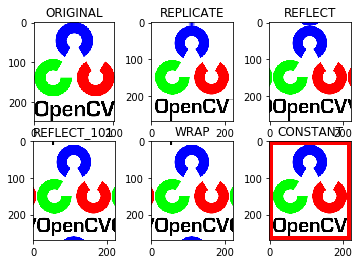

In [36]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

BLUE = [255, 0, 0]
img1 = cv.imread('opencv-log.png')

replicate = cv.copyMakeBorder(img1, 10, 10, 10, 10, cv.BORDER_REPLICATE)
reflect = cv.copyMakeBorder(img1, 10, 10, 10, 10, cv.BORDER_REFLECT)
reflect101 = cv.copyMakeBorder(img1, 10, 10, 10, 10, cv.BORDER_WRAP)
wrap = cv.copyMakeBorder(img1, 10, 10, 10, 10, cv.BORDER_WRAP)
constant = cv.copyMakeBorder(img1, 10, 10, 10, 10, cv.BORDER_CONSTANT, value = BLUE)

plt.subplot(231), plt.imshow(img1, 'gray'), plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')

plt.show()

# 圖像的算術運算
## 圖像添加
您可以通過OpenCV函數，cv.add（）或簡單地通過numpy操作添加兩個圖像，res = img1 + img2。兩個圖像應該具有相同的深度和類型，或者第二個圖像可以是標量值。  

> *注意*
> OpenCV添加和Numpy添加之間存在差異。OpenCV添加是飽和操作，而Numpy添加是模運算。

In [37]:
x = np.uint8([250])
y = np.uint8([10])
print(cv.add(x,y)) # 250+10=260 => 255
print(x+y)      # 250+10=260%256=4

[[255]]
[4]


添加兩個圖像時會更加明顯。OpenCV功能將提供更好的結果。所以總是更好地堅持OpenCV功能。

## 圖像混合
這也是圖像添加，但是對圖像賦予不同的權重，使得它具有混合感或透明感。圖像按以下等式添加：  
$g(x) = (1 - \alpha)f_{0}(x) + \alpha f_{1}(x)$  


通過改變從$\alpha 0 \rightarrow 1$  
在這裡，我拍了兩張圖片將它們混合在一起。第一圖像的權重為0.7，第二圖像的權重為0.3。cv.addWeighted（）在圖像上應用以下等式。  
$dst = \alpha \cdot img1 + \beta \cdot img2 + \gamma$  
這裡$\gamma$ 被視為零。

In [40]:
img1 = cv.imread('ml_308x380.png')
img2 = cv.imread('opencv-logo-white_308x380.jpg')

dst = cv.addWeighted(img1, 0.7, img2, 0.3, 0)

cv.imshow('dst', dst)
cv.waitKey(0)
cv.destroyAllWindows()

## Bitwise 操作
這包括按位AND，OR，NOT和XOR運算。它們在提取圖像的任何部分時非常有用（我們將在後面的章節中看到），定義和使用非矩形ROI等。下面我們將看到如何更改圖像的特定區域的示例。

我想將OpenCV徽標放在圖像上方。如果我添加兩個圖像，它將改變顏色。如果我混合它，我會得到一個透明的效果。但我希望它不透明。如果它是一個矩形區域，我可以使用ROI，就像我們在上一章中所做的那樣。但OpenCV徽標不是矩形。所以你可以通過按位操作來完成，如下所示：

In [43]:
# 加載兩張圖片
img1 = cv.imread('messi5.jpg')
img2 = cv.imread('opencv-logo-white.png')

# 在左上角放置logo，所以創建了一個 ROI
rows, cols, channels = img2.shape
roi = img1[0:rows, 0:cols]

# 創建一個 logo mask及創建一個 inverse logo mask
img2gray = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)
ret, mask = cv.threshold(img2gray, 10, 255, cv.THRESH_BINARY)
mask_inv = cv.bitwise_not(mask)

# 使 ROI 中的 logo 區域變黑(0)
img1_bg = cv.bitwise_and(roi, roi, mask=mask_inv)

# 僅從 logo 中獲取 logo 區域
img2_fg = cv.bitwise_and(img2, img2, mask=mask)

# 在 ROI 中放置 logo 並修改主圖像
dst = cv.add(img1_bg, img2_fg)
img1[0:rows, 0:cols] = dst

cv.imshow('mask', mask)
cv.imshow('mask_inv', mask_inv)
cv.imshow('img1_bg', img1_bg)
cv.imshow('img2_fg', img2_fg)
cv.imshow('res', img1)
cv.waitKey(0)
cv.destroyAllWindows()

# 績效評估和改進技術
## 使用 OpenCV 測量性能
cv.getTickCount函數返回參考事件（如機器開啟時刻）到調用此函數的時鐘週期數。因此，如果在函數執行之前和之後調用它，則會獲得用於執行函數的時鐘週期數。

cv.getTickFrequency函數返回時鐘週期的頻率，或每秒鐘的時鐘週期數。因此，要在幾秒鐘內找到執行時間，您可以執行以下操作：  
<code>
    e1 = cv.getTickCount()  
    \# 執行你的代碼  
    e2 = cv.getTickCount()  
    time = (e2-e1)/cv.getTickCount()  
</code>

In [46]:
# 下面的例子使用奇數大小從5到49的內核應用中值過濾。
#（不要擔心結果會是什麼樣的，這不是我們的目標）：
img1 = cv.imread('messi5.jpg')

e1 = cv.getTickCount()
for i in range(5,49,2):
    img1 = cv.medianBlur(img1, i)
e2 = cv.getTickCount()
t = (e2-e1)/cv.getTickFrequency()
print(t, " sec")

0.5358488428089856  sec


> *注意*  
> 您可以使用時間模塊執行相同操作。使用time.time（）函數, 而不是cv.getTickCount。然後取兩次的差異。

## OpenCV 中的默認優化
許多OpenCV功能都使用SSE2，AVX等進行了優化。它還包含未經優化的代碼。因此，如果我們的系統支持這些功能，我們應該利用它們（幾乎所有現代處理器都支持它們）。編譯時默認啟用它。因此，OpenCV運行優化代碼（如果已啟用），否則運行未優化代碼。您可以使用cv.useOptimized（）來檢查它是否已啟用/禁用，並使用cv.setUseOptimized（）來啟用/禁用它。讓我們看一個簡單的例子。

In [47]:
# 檢查是否啟用了優化
cv.useOptimized()

True

In [48]:
%timeit res = cv.medianBlur(img,49)
# 10個循環，最佳 3:34.9 ms 每個循環

30.3 ms ± 2.74 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [49]:
# 禁用它
cv.setUseOptimized(False)

In [50]:
cv.useOptimized()

False

In [51]:
%timeit res = cv.medianBlur(img, 49)

48.7 ms ± 6.28 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


# 測量 iPython中的性能
有時您可能需要比較兩個類似操作的性能。IPython為您提供了一個神奇的命令時間來執行此操作。它運行代碼幾次以獲得更準確的結果。它們再次適用於測量單行代碼。

例如，你知道以下哪個加法操作更好，x = 5; y = x ** 2，x = 5; y = x * x，x = np.uint8（[5]）; y = x * x或y = np.square（x）？我們將在IPython shell中找到它的timeit。

In [52]:
x = 5
%timeit y=x**2

327 ns ± 5.41 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [53]:
z = np.uint8([5])

In [54]:
%timeit y=z*z

675 ns ± 7.29 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [55]:
%timeit y=np.square(z)

612 ns ± 4.3 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


你可以看到，x = 5; y = x * x是最快的，與Numpy相比快了約20倍。如果您也考慮創建陣列，它可能會快達100倍。很酷，對嗎？*（Numpy開發者正在研究這個問題）*  
> *注意*  
> Python標量操作比Numpy標量操作更快。因此對於包含一個或兩個元素的操作，Python標量優於Numpy數組。當陣列的大小稍大時，Numpy會佔據優勢。

我們將再嘗試一個例子。這次，我們將比較同一圖像的cv.countNonZero（）和np.count_nonzero（）的性能。

In [57]:
img = cv.imread('opencv-log.png')
%timeit z = cv.countNonZero(img)

397 ns ± 10.1 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [58]:
%timeit z = np.count_nonzero(img)

1.03 µs ± 6.67 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


看，OpenCV功能比Numpy功能快近25倍。  
> *注意*  
> 通常，OpenCV函數比Numpy函數更快。因此，對於相同的操作，OpenCV功能是首選。但是，可能有例外，尤其是當Numpy使用視圖而不是副本時。

## 性能優化技術
有幾種技術和編碼方法可以利用Python和Numpy的最大性能。此處僅註明相關的內容，並提供重要來源的鏈接。這裡要注意的主要是，首先嘗試以簡單的方式實現算法。一旦工作，對其進行分析，找到瓶頸並進行優化。

1. 盡量避免在Python中使用循環，尤其是雙循環/三循環等。它們本身就很慢。
2. 將算法/代碼矢量化到最大可能範圍，因為Numpy和OpenCV針對向量運算進行了優化。
3. 利用緩存一致性。
4. 除非需要，否則永遠不要復制數組。嘗試使用視圖。陣列複製是一項昂貴的操作。
即使在完成所有這些操作之後，如果您的代碼仍然很慢，或者使用大型循環是不可避免的，請使用其他庫（如Cython）來加快速度。

# OpenCV 中的圖像處理
## 改變色彩空間
OpenCV中有150多種顏色空間轉換方法。但我們將只研究兩種最常用的，BGR Gray和BGR HSV。  
對於顏色轉換，我們使用函數cv.cvtColor（input_image，flag），其中flag確定轉換類型。

對於BGR Gray轉換，我們使用標誌cv.COLOR_BGR2GRAY。類似地，對於BGR HSV，我們使用標誌cv.COLOR_BGR2HSV。要獲取其他標誌，只需在Python終端中運行以下命令：

In [61]:
import cv2 as cv
flags = [i for i in dir(cv) if i.startswith('COLOR_')]
print(flags)

['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGR_EA', 'COLOR_BAYER_GB2BGR_VNG', 'COLOR_BAYER_GB2GRAY', 'COLOR_BAYER_GB2RGB', 'COLOR_BAYER_GB2RGB_EA', 'COLOR_BAYER_GB2RGB_VNG', 'COLOR_BAYER_GR2BGR', 'COLOR_BAYER_GR2BGR_EA', 'COLOR_BAYER_GR2BGR_VNG', 'COLOR_BAYER_GR2GRAY', 'COLOR_BAYER_GR2RGB', 'COLOR_BAYER_GR2RGB_EA', 'COLOR_BAYER_GR2RGB_VNG', 'COLOR_BAYER_RG2BGR', 'COLOR_BAYER_RG2BGR_EA', 'COLOR_BAYER_RG2BGR_VNG', 'COLOR_BAYER_RG2GRAY', 'COLOR_BAYER_RG2RGB', 'COLOR_BAYER_RG2RGB_EA', 'COLOR_BAYER_RG2RGB_VNG', 'COLOR_BGR2BGR555', 'COLOR_BGR2BGR565', 'COLOR_BGR2BGRA', 'COLOR_BGR2GRAY', 'COLOR_BGR2HLS', 'COLOR_BGR2HLS_FULL', 'COLOR_BGR2HSV', 'COLOR_BGR2HSV_FULL', 'COLOR_BGR2LAB', 'COLOR_BGR2LUV', 'COLOR_BGR2Lab', 'COLOR_BGR2Luv', 'COLOR_BGR2RGB', 'COLOR_BGR2RGBA', 'COLOR_BGR2XYZ', 'COLOR_BGR2YCR_CB', 'COLOR_BGR2YCrCb', 'COLOR_BGR

> *注意*  
> 對於HSV，色調(Hue)範圍是[0,179]，飽和(Saturation)範圍是[0,255]，值(Value)範圍是[0,255]。不同的軟件使用不同的規模 因此，如果要將OpenCV值與它們進行比較，則需要對這些範圍進行標準化。

## 對象跟蹤
現在我們知道如何將BGR圖像轉換為HSV，我們可以使用它來提取彩色對象。在HSV中，表示顏色比在BGR顏色空間中更容易。在我們的應用程序中，我們將嘗試提取藍色對象。所以這是方法：

* 拍攝視頻的每一幀
* 從BGR轉換為HSV顏色空間
* 我們將HSV圖像閾值為一系列藍色
* 現在單獨提取藍色對象，我們可以對我們想要的圖像做任何事情。  

以下是詳細評論的代碼：

In [62]:
import cv2 as cv
import numpy as np

cap = cv.VideoCapture(0)

while(1):
    # 拿取一個幀
    _, frame = cap.read()
    
    # 將 BGR 轉換為 HSV
    hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
    
    # 定義 HSV 中的藍色範圍
    lower_blue = np.array([110, 50, 50])
    upper_blue = np.array([130, 255, 255])
    
    # 閾值 HSV 圖像僅獲得藍色
    mask = cv.inRange(hsv, lower_blue, upper_blue)
    
    # Bitwise-AND 掩碼和原始圖像
    res = cv.bitwise_and(frame, frame, mask=mask)
    
    cv.imshow('frame', frame)
    cv.imshow('mask', mask)
    cv.imshow('res', res)
    k = cv.waitKey(5) & 0xFF
    if k == 27: # 'ESC'
        break
        
cv.destroyAllWindows()
cap.release()

> *注意*  
> 圖像中有一些噪音。我們將在後面的章節中看到如何刪除它們。  
> 這是對象跟踪中最簡單的方法。一旦你學習了輪廓的功能，你就可以做很多事情，比如找到這個物體的質心並用它來追踪物體，只需在鏡頭前移動你的手以及許多其他有趣的東西來繪製圖表。

## 如何找到要跟蹤的 HSV 值？
這是stackoverflow.com中常見的問題。它非常簡單，您可以使用相同的函數cv.cvtColor（）。您只需傳遞所需的BGR值，而不是傳遞圖像。例如，要查找Green的HSV值，請在Python終端中嘗試以下命令：

In [64]:
green = np.uint8([[[0, 255, 0]]])
hsv_green = cv.cvtColor(green, cv.COLOR_BGR2HSV)
print(hsv_green)

[[[ 60 255 255]]]


現在分別將[H-10,100,100]和[H + 10,255,255]作為下限和上限。除了這種方法，您可以使用任何圖像編輯工具，如GIMP或任何在線轉換器來查找這些值，但不要忘記調整HSV範圍。

# 圖像的幾何變換
## 轉換
OpenCV提供了兩個轉換函數cv.warpAffine和cv.warpPerspective，您可以使用它們進行各種轉換。cv.warpAffine採用2x3變換矩陣，而cv.warpPerspective採用3x3變換矩陣作為輸入。  

### 縮放
縮放只是調整圖像大小。為此，OpenCV附帶了一個函數cv.resize（）。可以手動指定圖像的大小，也可以指定縮放係數。使用不同的插值方法。優選的內插方法是cv.INTER_AREA用於收縮和cv.INTER_CUBIC（慢）cv.INTER_LINEAR用於變焦。默認情況下，使用的插值方法是cv.INTER_LINEAR，用於所有調整大小的目的。您可以使用以下方法之一調整輸入圖像的大小：

In [67]:
import numpy as np
import cv2 as cv

img = cv.imread('messi5.jpg')
res = cv.resize(img, None, fx=2, fy=2, interpolation=cv.INTER_CUBIC)
# or
# height, width = img.shape[:2]
# res = cv.resize(img, (2*width, 2*height), interpolation=cv.INTER_CUBIC)

cv.imshow('res', res)
cv.waitKey(0)
cv.destroyAllWindows()

### Translation
Translation是對象位置的轉換。如果你知道（x，y）方向的偏移，讓它為，你可以創建變換矩陣，如下所示：  
$(t_x,t_y)M$  
$M = \begin{bmatrix} 1 & 0 & t_x \\ 0 & 1 & t_y \end{bmatrix}$  
您可以將其設置為np.float32類型的Numpy數組，並將其傳遞給cv.warpAffine（）函數。有關（100,50）的搬移，請參見下面的示例：

In [70]:
import numpy as np
import cv2 as cv

img = cv.imread('messi5.jpg', 0)
rows, cols = img.shape

M = np.float32([[1,0,100], [0,1,50]])
dst = cv.warpAffine(img, M, (cols, rows))

cv.imshow('dst', dst)
cv.waitKey(0)
cv.destroyAllWindows()

*警告*  
cv.warpAffine（）函數的第三個參數是輸出圖像的大小，它應該是**（寬度，高度）**的形式。記住width =列數，height =行數。

### 迴轉
將圖像旋轉角度$\theta$  
$M = \begin{bmatrix} cos\theta & -sin\theta \\ sin\theta & cos\theta \end{bmatrix}$

但OpenCV提供可調旋轉，旋轉中心可調，因此您可以在任何您喜歡的位置旋轉。修正的變換矩陣由下式給出  
$\begin{bmatrix} \alpha & \beta & (1- \alpha ) \cdot center.x - \beta \cdot center.y \\ - \beta & \alpha & \beta \cdot center.x + (1- \alpha ) \cdot center.y \end{bmatrix}$  
當:  
$\begin{array}{l} \alpha = scale \cdot \cos \theta , \\ \beta = scale \cdot \sin \theta \end{array}$  
為了找到這個轉換矩陣，OpenCV提供了一個函數cv.getRotationMatrix2D。檢查以下示例，將圖像相對於中心旋轉90度而不進行任何縮放。

In [72]:
img = cv.imread('messi5.jpg', 0)
rows, cols = img.shape

# cols-1 和 rows-1 是座標限制
M = cv.getRotationMatrix2D(((cols-1)/2.0, (rows-1)/2.0), 90, 1)
dst = cv.warpAffine(img, M, (cols, rows))

cv.imshow('dst', dst)
cv.waitKey(0)
cv.destroyAllWindows()

### 仿射變換（Affine Transformation)
在仿射變換中，原始圖像中的所有平行線仍將在輸出圖像中平行。為了找到變換矩陣，我們需要輸入圖像中的三個點及其在輸出圖像中的相應位置。然後cv.getAffineTransform將創建一個2x3矩陣，該矩陣將傳遞給cv.warpAffine。

檢查以下示例，並查看我選擇的點（以綠色標記）：

C:\Users\wjche\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


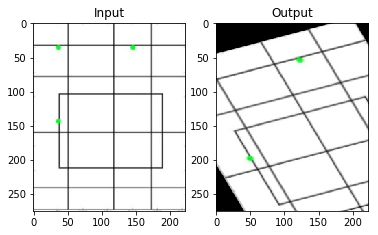

In [74]:
img = cv.imread('drawing.png')
rows, cols, ch = img.shape

pts1 = np.float32([[50,50], [200,50], [50,200]])
pts2 = np.float32([[10,100], [200,50], [100,250]])

M = cv.getAffineTransform(pts1, pts2)
dst = cv.warpAffine(img, M, (cols, rows))

plt.subplot(121), plt.imshow(img), plt.title('Input')
plt.subplot(122), plt.imshow(dst), plt.title('Output')
plt.show()

### 透視轉型（Perspective Transformation)
對於透視變換，您需要一個3x3變換矩陣。即使在轉換之後，直線仍將保持筆直。要找到此變換矩陣，輸入圖像上需要4個點，輸出圖像上需要相應的點。在這4個點中，其中3個不應該共線。然後可以通過函數cv.getPerspectiveTransform找到變換矩陣。然後將cv.warpPerspective應用於此3x3變換矩陣。

請參閱以下代碼：

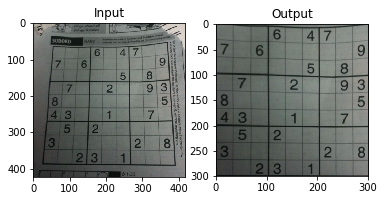

In [76]:
img = cv.imread('sudoku.jpg')
rows, cols, ch = img.shape

pts1 = np.float32([[56, 65], [368, 52], [28, 387], [389, 390]])
pts2 = np.float32([[0,0], [300,0], [0,300], [300,300]])

M = cv.getPerspectiveTransform(pts1, pts2)
dst = cv.warpPerspective(img, M, (300,300))

plt.subplot(121), plt.imshow(img), plt.title('Input')
plt.subplot(122), plt.imshow(dst), plt.title('Output')
plt.show()

# 圖像閾值
## 簡單的閾值處理
在這裡，事情是直截了當的。如果像素值大於閾值，則為其分配一個值（可以是白色），否則為其分配另一個值（可以是黑色）。使用的函數是cv.threshold。第一個參數是源圖像，它應該是灰度圖像。第二個參數是用於對像素值進行分類的閾值。第三個參數是maxVal，它表示如果像素值大於（有時小於）閾值則要給出的值。OpenCV提供不同類型的閾值，它由函數的第四個參數決定。不同的類型是：  

* cv.THRESH_BINARY
* cv.THRESH_BINARY_INV
* cv.THRESH_TRUNC
* cv.THRESH_TOZERO
* cv.THRESH_TOZERO_INV  

文檔清楚地解釋了每種類型的含義。請查看文檔。

獲得兩個輸出。第一個是retval，將在後面解釋。第二個輸出是我們的閾值圖像。

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('gradient.png', 0)
ret, thresh1 = cv.threshold(img, 127, 255, cv.THRESH_BINARY)
ret, thresh2 = cv.threshold(img, 127, 255, cv.THRESH_BINARY_INV)
ret, thresh3 = cv.threshold(img, 127, 255, cv.THRESH_TRUNC)
ret, thresh4 = cv.threshold(img, 127, 255, cv.THRESH_TOZERO)
ret, thresh5 = cv.threshold(img, 127, 255, cv.THRESH_TOZERO_INV)

